In [1]:
import sys
sys.path.append('/usr/local/ViennaRNA/python3.6/site-packages/') 

from models.RNA_landscapes import *
from utils.landscape_utils import *
from utils.sequence_utils import *

from ian_rna_utils import *
import RNA
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm
from matplotlib import rc
rc("font", family = "serif",size=20)
rc("figure",figsize=(9,6))
rc("figure",facecolor="white")
%config InlineBackend.figure_format = 'retina'

def rmse(pred,target):
    return np.sqrt(((pred - target) ** 2).mean())

In [10]:
RNA.__file__

'/usr/local/ViennaRNA/lib/python3.6/site-packages/RNA/__init__.py'

In [2]:
RNAA="CUGA"
seq_len=75 #fix this for now, only dealing with substitutions
num_sequences=1000
n_mutations = 10

sequences=generate_random_sequences(seq_len,num_sequences,alphabet=RNAA)
# sequences


In [3]:
base_seq = 'UCCCUCCGAUACGUCUAUUCCCUGCACUCCUUCUAGUAUGCAGCCUGACU'
base_fit = RNA.fold(base_seq)[1]
mut_seq, mut_list = gen_n_mutations(base_seq,n_mutations)
mut_fit = RNA.fold(mut_seq)[1]

In [4]:

while np.abs(base_fit-mut_fit)<4:
    mut_seq, mut_list = gen_n_mutations(base_seq,n_mutations)
    mut_fit = RNA.fold(mut_seq)[1]
print(base_fit)
print(mut_list)
print(mut_fit)

-6.800000190734863
['U4A' 'G7U' 'C14G' 'U15A' 'U27A' 'C29A' 'U30C' 'C32U' 'G35A' 'G42U']
-2.799999952316284


In [5]:
mut_list = np.array(mut_list)

In [6]:
N = len(mut_list)
base_str = '{:0'+str(N)+'b}'
y = np.zeros(2**N)
# mut_list =np.array( ['A','B','C'])
# lookup = {}
for i in range(2**N):
    idx = np.array(list(base_str.format(i)),dtype=np.int).astype(np.bool)
#     print(idx)
#     print(mut_list[idx])
    y[i] = RNA.fold(do_mut_list(base_seq,mut_list[idx]))[-1]


In [7]:

def calc_bkd_epi(y,N=None):
    if N is None:
        N = np.int(np.log2(y.shape[0]))
    V = gen_V(N)
    H = gen_H(N)
    return V @ H @ y
def calc_ref_epi(y,N=None):
    if N is None:
        N = np.int(np.log2(y.shape[0]))
    G = gen_G(N)
    
    return G @ y

def get_N_nonzero(seq,mut_list,threshold = .2):
    mut_list = np.asanyarray(mut_list)
    N = len(mut_list)
    for i in range(2**N):
        idx = np.array(list(base_str.format(i)),dtype=np.int).astype(np.bool)
        y[i] = RNA.fold(do_mut_list(seq,mut_list[idx]))[-1]
    return np.sum(np.abs(ref_epi(y))<threshold),np.sum(np.abs(    bkgd_epi(y))<threshold)

    
plt.plot(ref_epi(y))
plt.plot(bkgd_epi(y))
plt.xlim([0,200])
plt.show()

NameError: name 'ref_epi' is not defined

In [241]:
non_zeros = np.zeros([len(sequences),2])
for i in tqdm(range(len(sequences))):
    s = sequences[i]
    mut_seq, mut_list = gen_n_mutations(s,n_mutations)
    non_zeros[i] = get_N_nonzero(s,mut_list)

In [242]:
sequences[0]

'CCCGUAUGGCGGCUUCAGUAGAACUCAGUGACAAAAGGCUGUCAUCGCACAUGGGAGGGCCAACUUCAGAAUCGU'

In [243]:
non_zeros

array([[ 397.,  540.],
       [ 223.,  401.],
       [ 593.,  622.],
       ..., 
       [ 353.,  478.],
       [ 192.,  313.],
       [ 219.,  517.]])

In [244]:
mut_list = gen_n_mutations(sequences[1],n=n_mutations)[1]

get_N_nonzero(sequences[0],mut_list)

(529, 674)

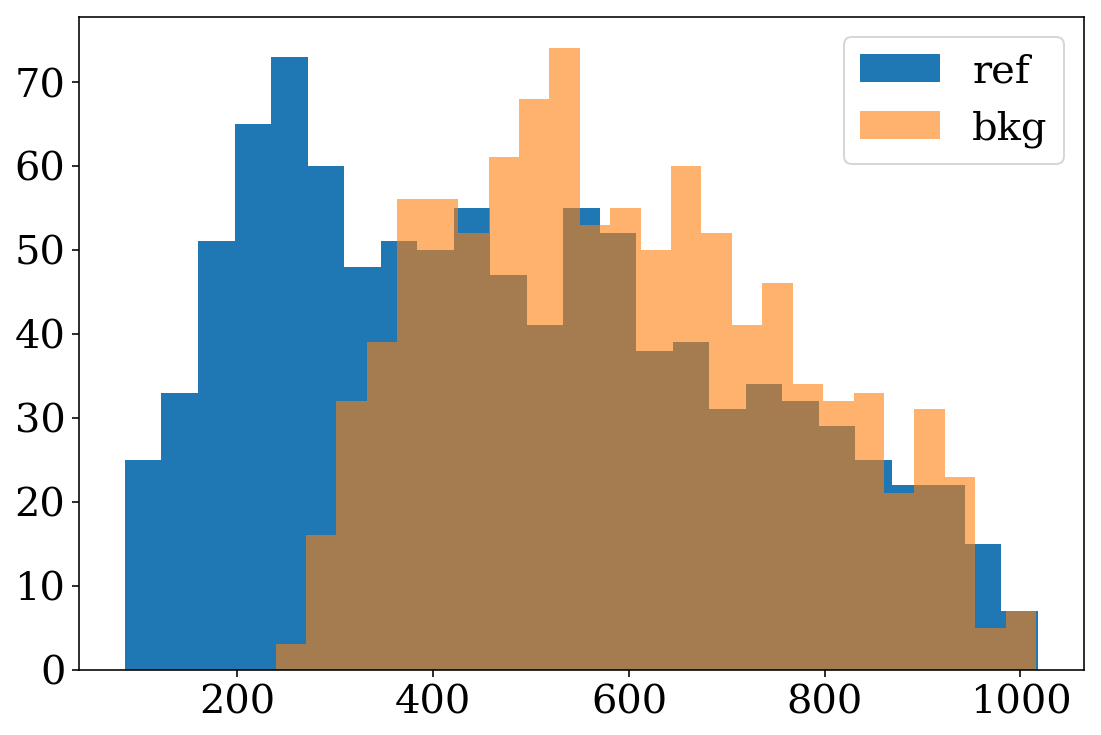

In [245]:
nbins = 25
plt.hist(non_zeros[:,0],bins=nbins,label='ref')
plt.hist(non_zeros[:,1],bins=nbins,label='bkg',alpha=.6)
plt.legend()
plt.show()

In [364]:
base_seq = 'UCCCUCCGAUACGUCUAUUCCCUGCACUCCUUCUAGUAUGCAGCCUGACU'
base_fit = RNA.fold(base_seq)[1]
mut_seq, mut_list = gen_n_mutations(base_seq,n_mutations)
mut_list 
mut_fit = RNA.fold(mut_seq)[1]

In [365]:
mut_fit

-8.600000381469727

In [366]:
N = len(mut_list)
base_str = '{:0'+str(N)+'b}'
y = np.zeros(2**N)
for i in range(2**N):
    idx = np.array(list(base_str.format(i)),dtype=np.int).astype(np.bool)
    y[i] = RNA.fold(do_mut_list(base_seq,mut_list[idx]))[-1]


TypeError: only integer scalar arrays can be converted to a scalar index

In [367]:
epi = bkgd_epi(y)
# epi = epi[np.abs(epi)<2]

ref = ref_epi(y)
ref = ref[np.abs(ref)<2]
nbins = 105
plt.hist(epi,bins=nbins,density=True)
plt.hist(ref,bins= nbins,density=True)
plt.show()

TypeError: 'numpy.ndarray' object is not callable

In [368]:
np.log2(y.shape[0])

10.0

In [369]:
epi_mat  = gen_V(10)@gen_H(10)


thresh = .4
sig_idx  = np.abs(epi)> thresh
omega_sig = epi[sig_idx]


In [8]:
bkd_inv = np.linalg.inv(gen_V(10)@gen_H(10))
ref_inv = np.linalg.inv(gen_G(10))

def calc_phenotype_old(base_seq,mut_list):
    N = len(mut_list)
    base_str = '{:0'+str(N)+'b}'
    y = np.zeros(2**N)
    for i in range(2**N):
        idx = np.array(list(base_str.format(i)),dtype=np.int).astype(np.bool)
        y[i] = RNA.fold(do_mut_list(base_seq,mut_list[idx]))[-1]
    return y
def calc_phenotype(base_seq,mut_list):
    """
    Won't work for N mutations >16, for that change the below uint16 to be uint64 or something
    """
    N = len(mut_list)
    
    binary_array = np.unpackbits(np.arange(2**N, dtype=np.uint16).view(np.uint8)[:,None],axis=1)
    binary_array  = np.hstack((binary_array[1::2],binary_array[::2]))[:,-N:].astype(np.bool)
    y = np.zeros(2**N)
    for i,idx in enumerate(binary_array):
#         idx = np.array(list(base_str.format(i)),dtype=np.int).astype(np.bool)
        y[i] = RNA.fold(do_mut_list(base_seq,mut_list[idx]))[-1]
    return y
def GOP(pred,y):
    SST = np.sum(y**2)
    SSE = np.sum((pred-y)**2)
    return 1/(1+SSE/SST)

In [9]:
base_seq = 'UCCCUCCGAUACGUCUAUUCCCUGCACUCCUUCUAGUAUGCAGCCUGACU'
base_fit = RNA.fold(base_seq)[1]
mut_seq, mut_list = gen_n_mutations(base_seq,n_mutations)
mut_list 
mut_fit = RNA.fold(mut_seq)[1]
sequence_length = 20
n_mutations = 10
base_seq=generate_random_sequences(sequence_length,1,alphabet=RNAA)[0]
mut_seq, mut_list = gen_n_mutations(base_seq,n_mutations)
mut_list 

y =calc_phenotype(base_seq,mut_list)
def f(epi,inv_matrix,n_terms,y,error_metric = 'rmse'):
    sig_idx = np.flip(np.argsort(np.abs(epi)),axis=0)[:n_terms]
    pred = inv_matrix[:,sig_idx] @ epi[sig_idx]
    if error_metric == 'rmse':
        return rmse(pred,y)
    elif error_metric =='gop':
        return GOP(pred,y)

Ns = np.arange(1024)
errs_bkd = np.zeros(Ns.shape)
errs_ref = np.zeros(Ns.shape)

bkd_epi = calc_bkd_epi(y)
ref_epi = calc_ref_epi(y)

err_metric = 'gop'
for n in tqdm(range(Ns.shape[0])):
    
    errs_bkd[n] = f(bkd_epi,bkd_inv,Ns[n],y,err_metric)
    errs_ref[n] = f(ref_epi,ref_inv,Ns[n],y,err_metric)
    
    

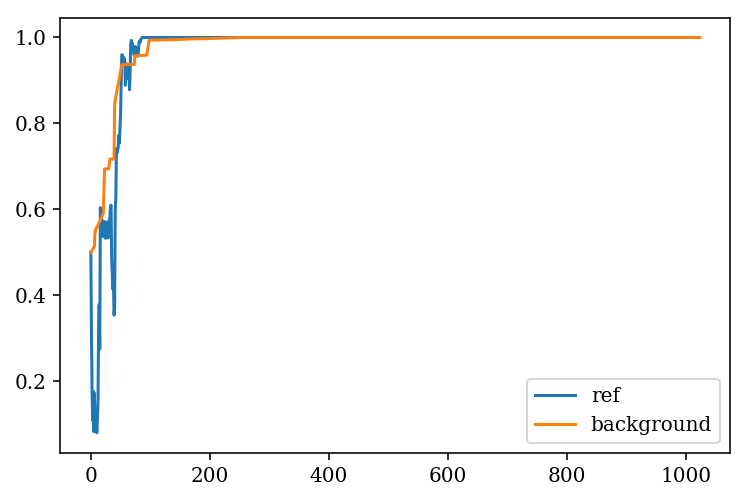

In [10]:
plt.plot(Ns,errs_ref,label='ref')
plt.plot(Ns,errs_bkd,label='background')
plt.legend()
# plt.yscale('log')
# plt.xscale('log')
plt.show()

In [11]:
def get_order_list(n=10):
    binary_array = np.unpackbits(np.arange(2**N, dtype=np.uint16).view(np.uint8)[:,None],axis=1)
    binary_array  = np.hstack((binary_array[1::2],binary_array[::2]))[:,-n:]
    return np.sum(binary_array,axis=1)


In [12]:
sequence_length = 20
n_mutations = 10
base_seq=generate_random_sequences(sequence_length,1,alphabet=RNAA)[0]
mut_seq, mut_list = gen_n_mutations(base_seq,n_mutations)
mut_list 
orders_10 = get_order_list(10)

y =calc_phenotype(base_seq,mut_list)
def f_order(epi,inv_matrix,order,y,error_metric = 'rmse'):
    idx = orders_10 <= order
#     sig_idx = np.flip(np.argsort(np.abs(epi)),axis=0)[:n_terms]
    pred = inv_matrix[:,idx] @ epi[idx]
    if error_metric == 'rmse':
        return rmse(pred,y)
    elif error_metric =='gop':
        return GOP(pred,y)

Ns = np.arange(1024)
errs_bkd = np.zeros(n_mutations)
errs_ref = np.zeros(n_mutations)

bkd_epi = calc_bkd_epi(y)
ref_epi = calc_ref_epi(y)

err_metric = 'gop'
for n in tqdm(range(10)):
    
    errs_bkd[n] = f_order(bkd_epi,bkd_inv,Ns[n],y,err_metric)
    errs_ref[n] = f_order(ref_epi,ref_inv,Ns[n],y,err_metric)
    
    

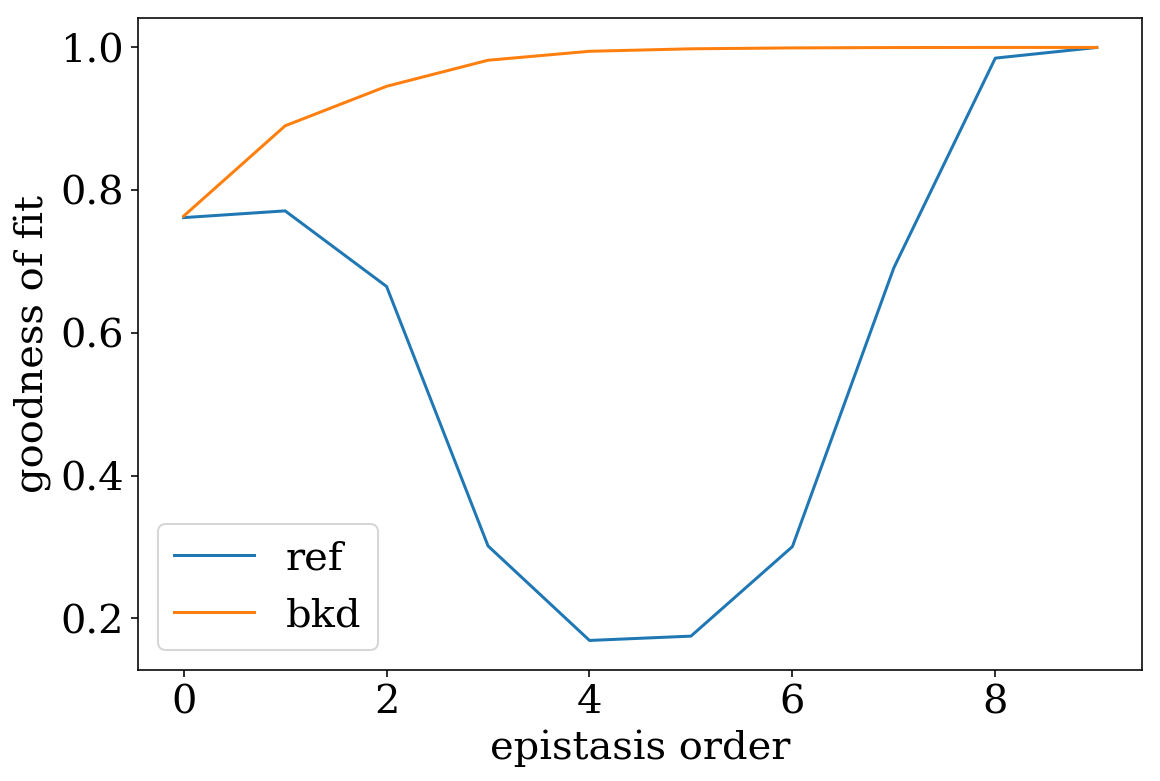

In [20]:
plt.plot(errs_ref,label='ref')
plt.plot(errs_bkd,label='bkd')
plt.legend()
plt.xlabel('epistasis order')
plt.ylabel('goodness of fit')
plt.show()

In [27]:
def dododo():
    base_seq=generate_random_sequences(sequence_length,1,alphabet=RNAA)[0]
    mut_seq, mut_list = gen_n_mutations(base_seq,n_mutations)
    orders_10 = get_order_list(10)

    y =calc_phenotype(base_seq,mut_list)
    def f_order(epi,inv_matrix,order,y,error_metric = 'rmse'):
        idx = orders_10 <= order
        pred = inv_matrix[:,idx] @ epi[idx]
        if error_metric == 'rmse':
            return rmse(pred,y)
        elif error_metric =='gop':
            return GOP(pred,y)

    errs_bkd = np.zeros(n_mutations)
    errs_ref = np.zeros(n_mutations)

    bkd_epi = calc_bkd_epi(y)
    ref_epi = calc_ref_epi(y)

    err_metric = 'gop'
    for n in range(10):
        errs_bkd[n] = f_order(bkd_epi,bkd_inv,n,y,err_metric)
        errs_ref[n] = f_order(ref_epi,ref_inv,n,y,err_metric)
    return errs_ref,errs_bkd
n_do = 100
full_bkd = np.zeros([n_do,10])
full_ref = np.zeros([n_do,10])
for i in tqdm(range(n_do)):
    full_ref[i], full_bkd[i] = dododo()
    

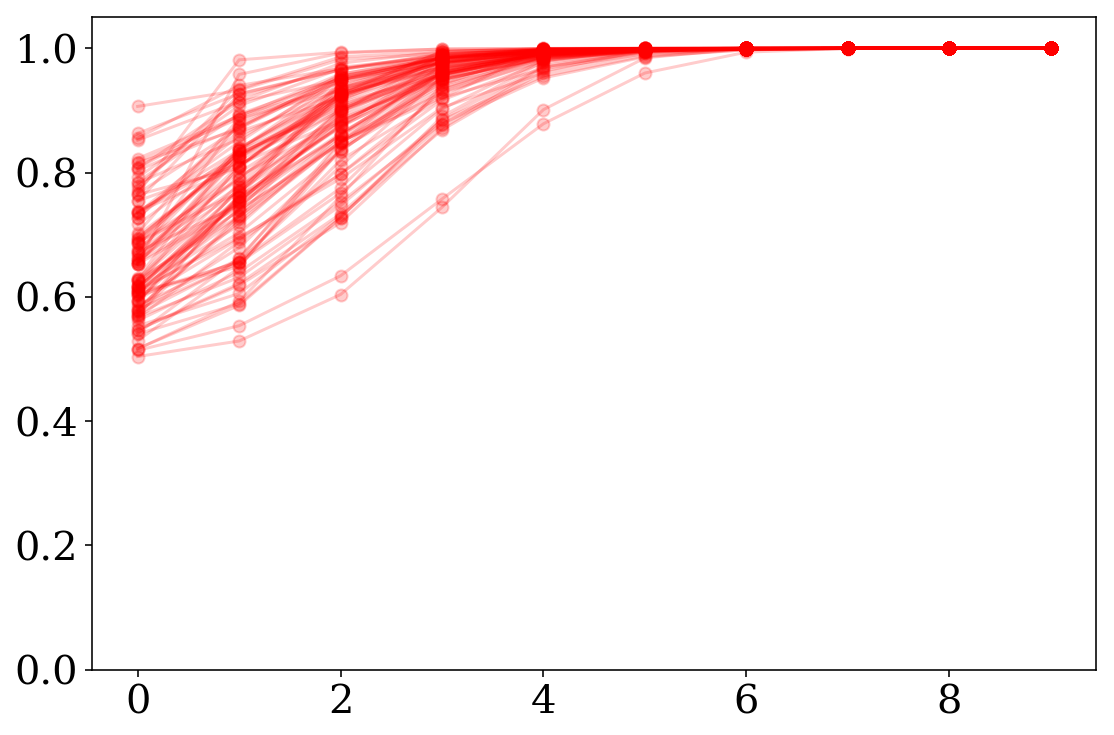

In [93]:
# line_ref = plt.plot(full_ref.T,'k-o',alpha=.5)[0]
line_bkd = plt.plot(full_bkd.T,'r-o',alpha=.2)[0]
plt.ylim([0,1.05])
# plt.legend((line_ref,line_bkd),('ref','bkd'))
plt.show()

In [7]:
RNA.

In [28]:
ub_ref = np.percentile(full_ref,95,axis=0)
lb_ref = np.percentile(full_ref,4,axis=0)

In [29]:
lb_ref

array([ 0.2323262 ,  0.1115109 ,  0.06941192,  0.07399525,  0.07432244,
        0.13071059,  0.38211457,  0.78902782,  0.97468915,  0.99850504])

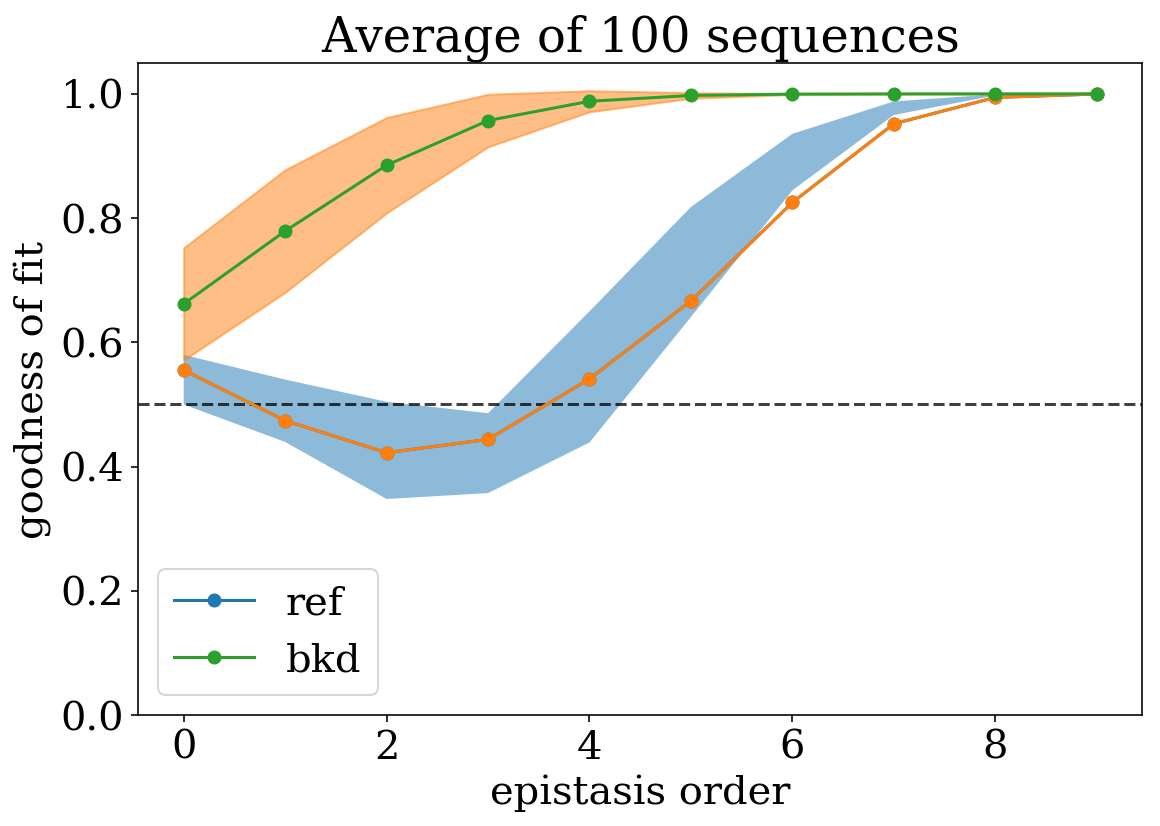

In [30]:
plt.axhline(.5,linestyle='--',alpha=.75,color='k')
plt.plot(np.mean(full_ref,axis=0),'-o',label='ref')

ref_mean = np.mean(full_ref,axis=0)
# ref_mean = np.percentile(full_ref,50,axis=0)
plt.plot(ref_mean,'-o')
ref_std = np.std(full_ref,axis=0)
ub_ref= ref_mean+ref_std
lb_ref= ref_mean-ref_std
ub_ref = np.percentile(full_ref,60,axis=0)
lb_ref = np.percentile(full_ref,40,axis=0)

bkd_mean = np.mean(full_bkd,axis=0)
bkd_std = np.std(full_bkd,axis=0)
ub_bkd= bkd_mean+bkd_std
lb_bkd= bkd_mean-bkd_std

plt.plot(np.mean(full_bkd,axis=0),'-o',label='bkd')



plt.fill_between(range(ref_mean.shape[0]), ub_ref, lb_ref,
                 color=None, alpha=.5)
plt.fill_between(range(bkd_mean.shape[0]), ub_bkd, lb_bkd,color='tab:orange' ,alpha=.5)
plt.legend()
plt.xlabel('epistasis order')
plt.ylabel('goodness of fit')
plt.ylim([0,1.05])
plt.title(f'Average of {n_do} sequences')

plt.show()

## Do that but with bootstrapping for CI

In [31]:
for i in range(10):
    resampled = np.random.choice(full_ref[:,i],size=[1000,full_ref[:,3].shape[0]],replace=True)
ref_means = resampled.mean(axis=1)
lb = np.percentile(ref_means,40)
ub = np.percentile(ref_means,60)


In [136]:
def bootstrap(arr,n_resamp = 10000,lower_per= 5,upper_per = 95):
    """
    bootstraps an estimate of the mean and the confidence interval
    """

    resampled_means = np.apply_along_axis(np.random.choice,axis=0,arr =arr,size=[n_resamp,arr.shape[0]],
                              replace=True).mean(axis=1)
    
    median = np.percentile(resampled_means,50,axis=0)
    ub = np.percentile(resampled_means,upper_per,axis=0)
    lb = np.percentile(resampled_means,lower_per,axis=0)
    yerr = np.vstack([np.abs(lb-median),ub-median])
    return median,lb,ub,yerr
upper = 100
lower = 0
ref_boot = bootstrap(full_ref,lower_per=lower,upper_per=upper)
bkd_boot = bootstrap(full_bkd,lower_per=lower,upper_per=upper)

(500, 100, 10)


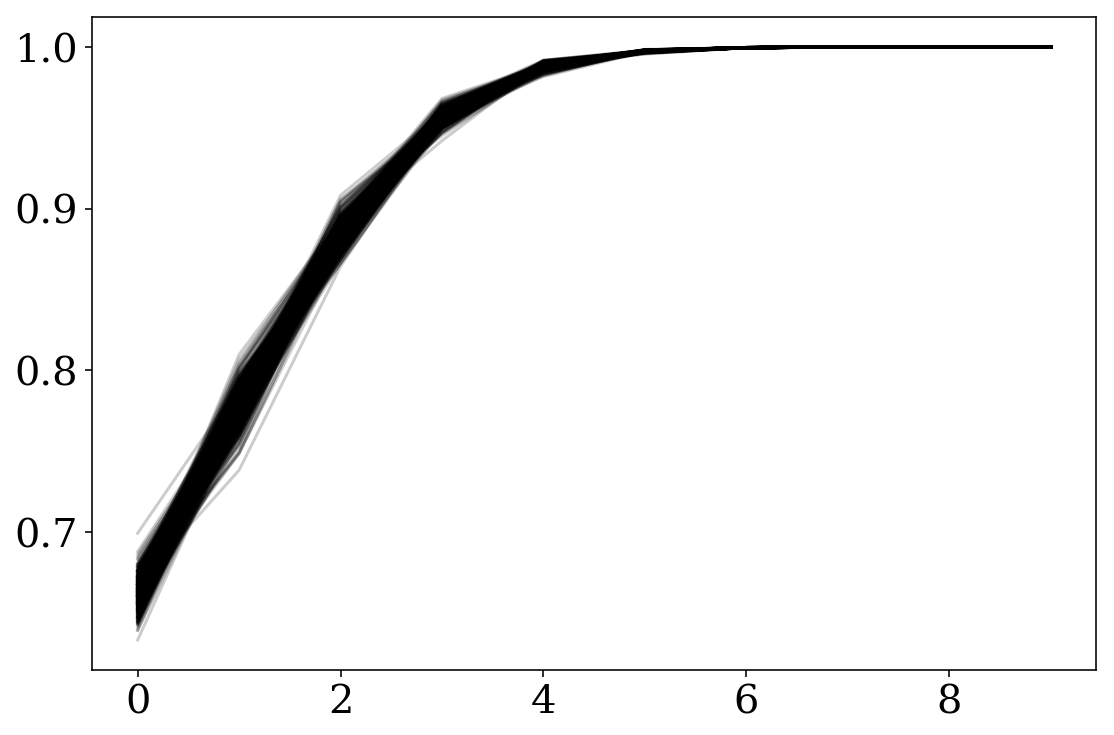

In [137]:
arr = full_bkd
n_resamp = 500
resampled_means = np.apply_along_axis(np.random.choice,axis=0,arr =arr,size=[n_resamp,arr.shape[0]],
                              replace=True)
print(resampled_means.shape)
plt.plot(resampled_means.mean(axis=1).T,color='k',alpha=.2)
plt.show()

<ErrorbarContainer object of 3 artists>

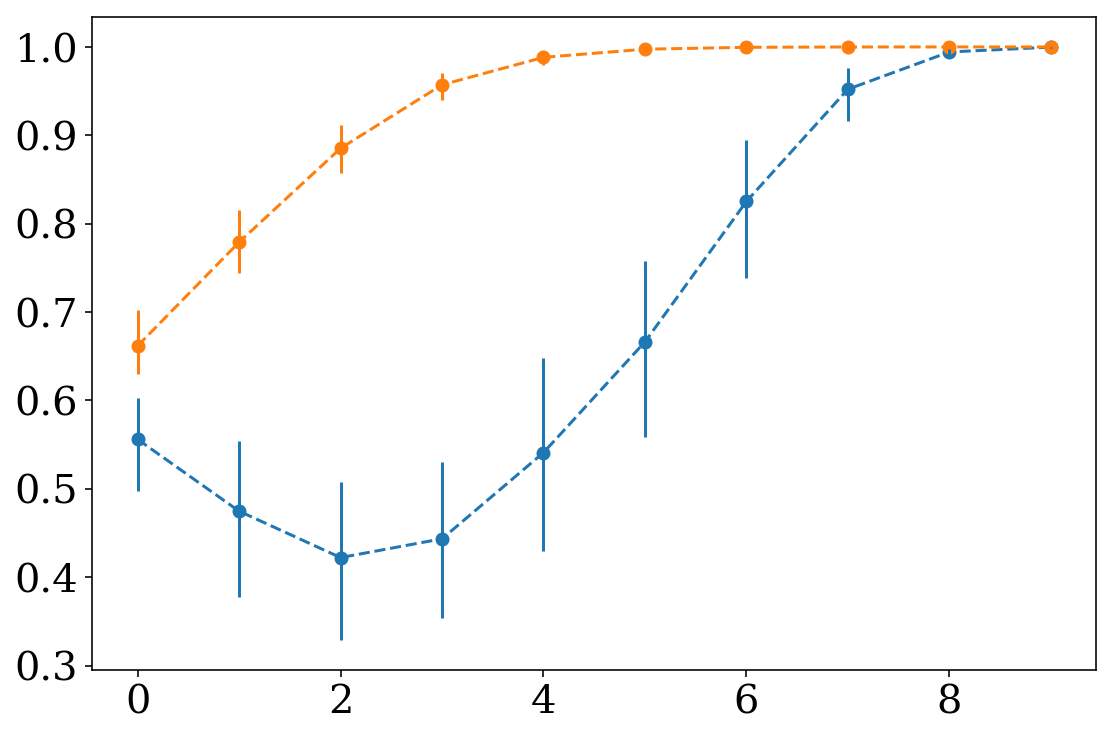

In [138]:
X = np.arange(10)
plt.errorbar(X,ref_boot[0],yerr=ref_boot[-1],barsabove=True,fmt='--o')

# line_bkd = plt.plot(full_bkd.T,'r-o',alpha=.2)[0]
plt.errorbar(X,bkd_boot[0],yerr=bkd_boot[-1],barsabove=True,fmt='--o')


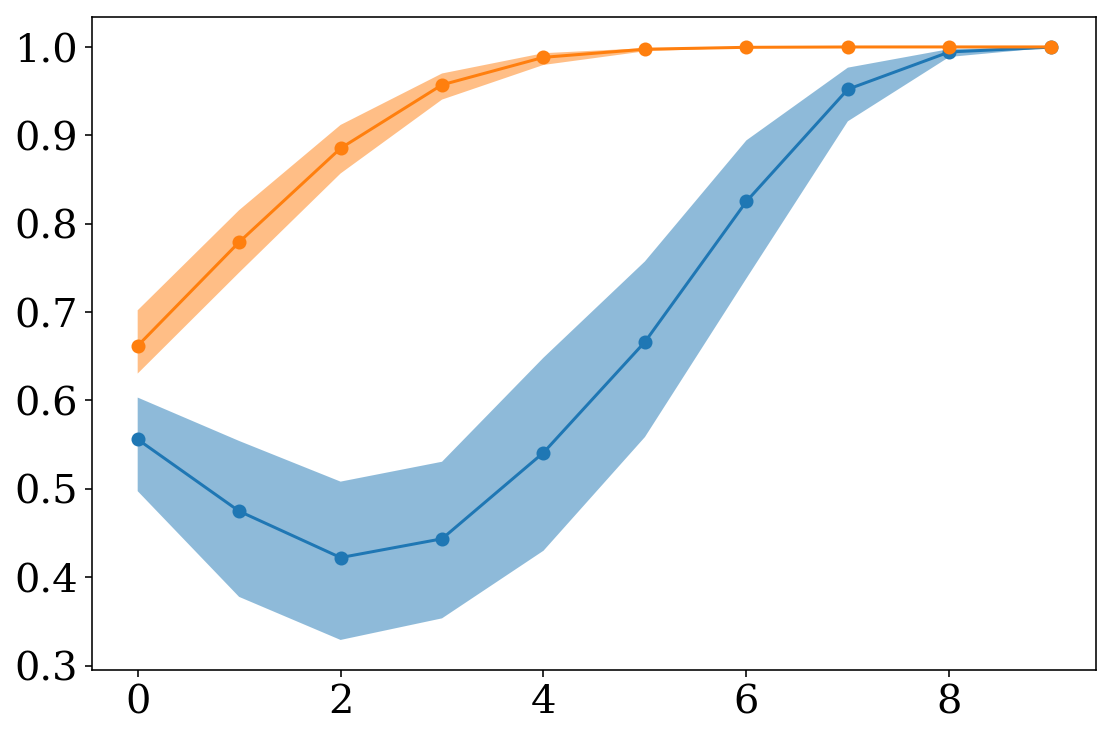

In [139]:
plt.plot(ref_boot[0],'-o')
plt.fill_between(X,ref_boot[1],ref_boot[2],alpha=.5)
plt.plot(bkd_boot[0],'-o')
plt.fill_between(X,bkd_boot[1],bkd_boot[2],alpha=.5)

In [127]:
ref_boot[1]+ref_boot[0]

array([ 0.60767289,  0.55592744,  0.50673337,  0.55601125,  0.65667467,
        0.78310937,  0.91582343,  0.98005692,  0.99983302,  1.00020153])

[[  3.51028811e-03   5.44454586e-03   5.98310376e-03   6.05619216e-03
    7.10663623e-03   6.78934843e-03   4.69959536e-03   1.85658120e-03
    3.05152348e-04   1.97474491e-05]
 [  2.10119247e-03   3.26116502e-03   3.04880446e-03   4.37641427e-03
    4.17889203e-03   3.79289324e-03   2.17714241e-03   8.47695555e-04
    1.02446845e-04   3.12809829e-06]]


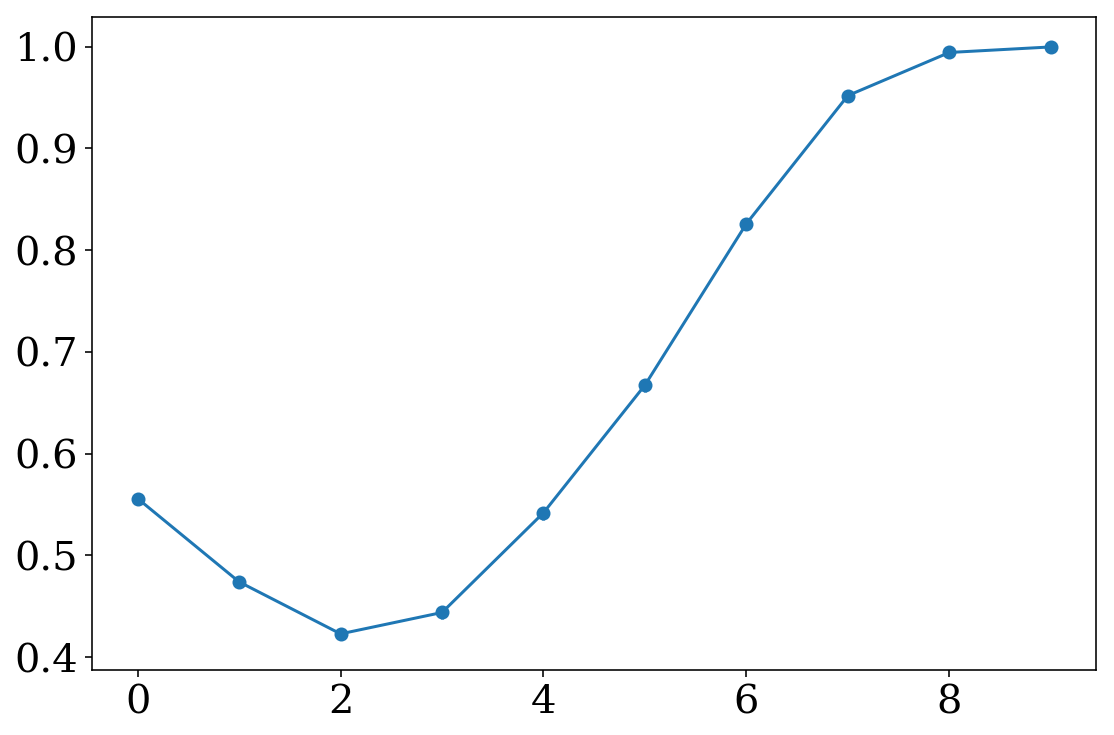

In [52]:
mean = np.percentile(out.mean(axis=1),50,axis=0)
yerr = np.zeros((2,10))
yerr[0,:]=np.abs(np.percentile(out.mean(axis=1),60,axis=0)-mean)
yerr[1,:]=np.percentile(out.mean(axis=0),95,axis=0)-mean
plt.errorbar(np.arange(10),mean,yerr=yerr,fmt='-o')

print(yerr)# plt.plot(np.percentile(out.mean(axis=0),95,axis=0))
# plt.plot(np.percentile(out.mean(axis=0),5,axis=0))

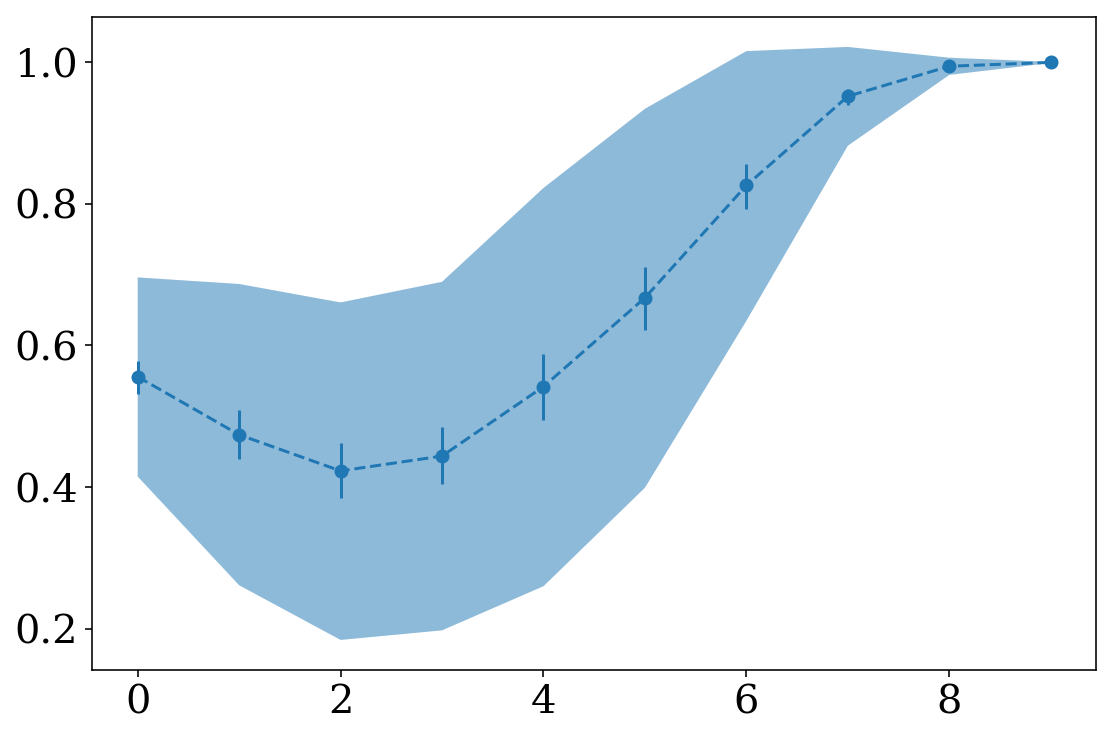

In [68]:
# yerr = np.zeros([2,10])
yerr = np.vstack([lb,ub])
plt.errorbar(np.arange(10),fifty_percentile,yerr=yerr,fmt='--o')
ref_std = np.std(full_ref,axis=0)
ub_ref= ref_mean+ref_std
lb_ref= ref_mean-ref_std



plt.fill_between(range(ref_mean.shape[0]), ub_ref, lb_ref,
                 color=None, alpha=.5)

In [61]:
lb

array([-0.02380041, -0.03470665, -0.03839087, -0.03999401, -0.04726952,
       -0.04527577, -0.03260565, -0.01211313, -0.00220105, -0.00015248])

In [508]:
def calc_phenotype(base_seq,mut_list):
    """
    Won't work for N mutations >16, for that change the below uint16 to be uint64 or something
    """
    N = len(mut_list)
    
    binary_array = np.unpackbits(np.arange(2**N, dtype=np.uint16).view(np.uint8)[:,None],axis=1)
    binary_array  = np.hstack((binary_array[1::2],binary_array[::2]))[:,-N:].astype(np.bool)
    y = np.zeros(2**N)
    for i,idx in enumerate(binary_array):
#         idx = np.array(list(base_str.format(i)),dtype=np.int).astype(np.bool)
        y[i] = RNA.fold(do_mut_list(base_seq,mut_list[idx]))[-1]
    return y
print(calc_phenotype(base_seq,mut_list))
print(calc_phenotype_old(base_seq,mut_list))

[ 0.          0.         -1.79999995 ..., -0.89999998 -0.40000001  0.        ]
[ 0.          0.         -1.79999995 ..., -0.89999998 -0.40000001  0.        ]


In [507]:
def calc_phenotype_old(base_seq,mut_list):
    N = len(mut_list)
    base_str = '{:0'+str(N)+'b}'
    y = np.zeros(2**N)
    for i in range(2**N):
        idx = np.array(list(base_str.format(i)),dtype=np.int).astype(np.bool)
#         if i <3:
#             print(idx)
        
        y[i] = RNA.fold(do_mut_list(base_seq,mut_list[idx]))[-1]
    return y
print(calc_phenotype_old(base_seq,mut_list))

[ 0.          0.         -1.79999995 ..., -0.89999998 -0.40000001  0.        ]


In [497]:
N = 10
binary_array = np.unpackbits(np.arange(2**N, dtype=np.uint16).view(np.uint8)[:,None],axis=1)
arr = np.hstack((binary_array[1::2],binary_array[::2]))
i = 3
print(binary_array[::2][i])
print(binary_array[1::2][i])
arr[i][-N:]

[0 0 0 0 0 0 1 1]
[0 0 0 0 0 0 0 0]


array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1], dtype=uint8)

In [469]:
arr = np.arange(25).reshape(5,5)
print(arr)
print(' ')
print(arr[1::2])

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]]
 
[[ 5  6  7  8  9]
 [15 16 17 18 19]]


In [428]:
N = len(mut_list)
print(N)
binary_array = np.unpackbits(np.arange(2**N,dtype=np.uint16)[:, None],axis=1)
# [:,N:].astype(np.bool)
binary_array.shape

10


TypeError: Expected an input array of unsigned byte data type

In [442]:
np.arange(int(1e6), dtype=np.uint16).view(np.uint8)

np.unpackbits(np.arange(2**16, dtype=np.uint16).view(np.uint8)[:,None],axis=1)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       ..., 
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint8)

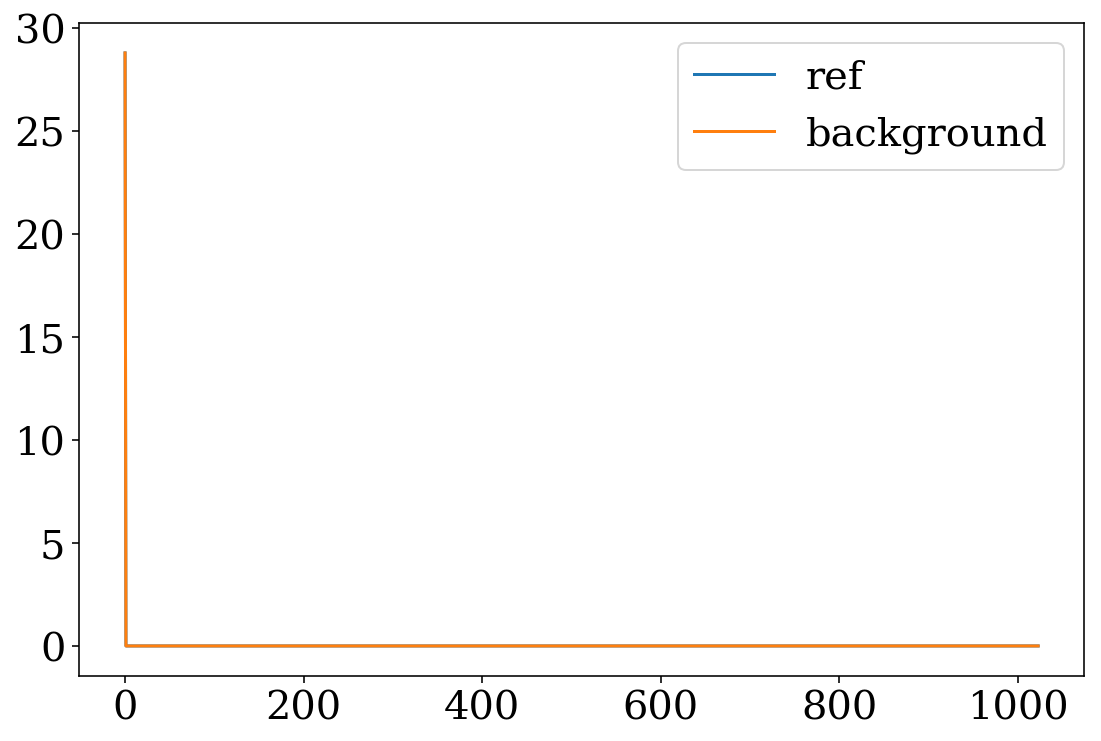

In [417]:
plt.plot(Ns,errs_ref,label='ref')
plt.plot(Ns,errs_bkd,label='background')
plt.legend()
# plt.yscale('log')
# plt.xscale('log')
plt.show()

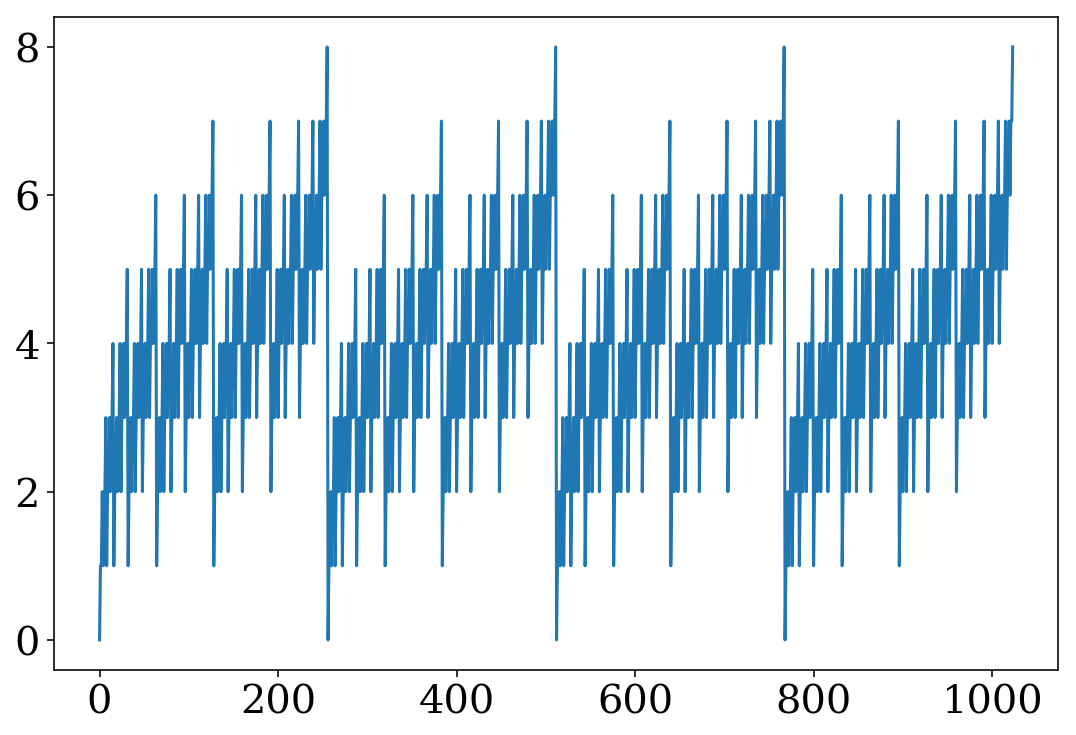

In [409]:
binary_array = np.unpackbits(np.arange(1024,dtype=np.uint8)[:, None],axis=1)[:,-10:]

orders = binary_array.sum(axis=1)
plt.plot(orders)


In [324]:
thresholds = np.linspace(np.max(np.abs(epi)),.1)
errs_bkd = np.zeros_like(thresholds)
errs_ref = np.zeros_like(thresholds)
Ns = np.zeros_like(thresholds)
for i,thresh in enumerate(thresholds):
    sig_idx  = np.abs(epi)> thresh
    omega_sig = epi[sig_idx]
    pred_bkd = inv_mat_bkd[:,sig_idx] @ omega_sig
    Ns[i] = sig_idx.sum()
    errs[i] = rmse(pred,y)

In [320]:
Ns

array([   0.,    1.,    1.,    1.,    1.,    1.,    1.,    1.,    1.,
          1.,    1.,    1.,    1.,    1.,    1.,    1.,    1.,    1.,
          1.,    1.,    1.,    1.,    1.,    1.,    1.,    1.,    1.,
          1.,    1.,    1.,    1.,    1.,    1.,    1.,    1.,    1.,
          2.,    2.,    4.,    5.,    5.,    7.,   10.,   15.,   20.,
         27.,   43.,   69.,  140.,  294.])

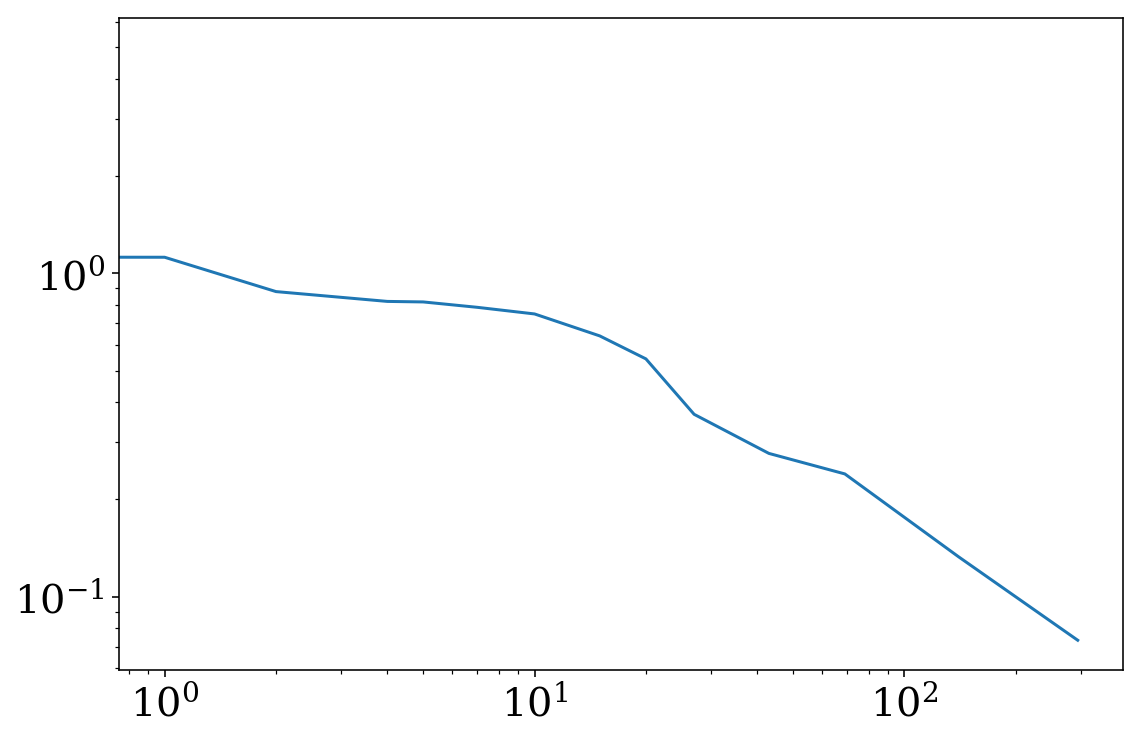

In [322]:
plt.loglog(Ns,errs)

In [15]:
wt = .89
A = .29
B = .78
C = .33
AB = 1.31
AC = .32
BC = .32
ABC = .29

wt_slice = np.array(
         [[wt,A,B,C],
          [A,A,AB,AC],
          [B,AB,B,BC],
          [C,AC,BC,C]])
A_slice = np.array(
         [[A,A,AB, AC],
          [A,A,AB,AC],
          [AB,AB,AB,ABC],
          [AC,AC,ABC,C]])
B_slice = np.array(
         [[B,AB,B,BC],
          [AB,AB,AB,ABC],
          [B,AB,B,BC],
          [BC,ABC,BC,BC]])
C_slice = np.array(
         [[C,AC,AB, AC],
          [A,AC,AB,AC],
          [AB,AB,AB,ABC],
          [AC,AC,ABC,C]])

np.array([[wt,A,B,C],
          [A,A,AB,AC],
          [B,AB,B,BC],
          [C,AC,BC,C]])

array([[ 0.89,  0.29,  0.78,  0.33],
       [ 0.29,  0.29,  1.31,  0.32],
       [ 0.78,  1.31,  0.78,  0.32],
       [ 0.33,  0.32,  0.32,  0.33]])

In [18]:
'A' in ['A','BC']

True

In [20]:
def fitness(muts):
    """
    muts is a list of 'A','B','C'
    """
    
    if 'A' in muts:
        if 'B' in muts:
            if 'C' in muts:
                return .29
            else:
                return 1.31
        elif 'C' in muts:
            return .32
        else:
            return .29
    elif 'B' in muts:
        if 'C' in muts:
            return .32
        else:
            return .78
    elif 'C' in muts:
        return .33
    else:
        #wt
        return .89

In [23]:
fitness(['A','A'])

0.29

In [21]:
mut_list  = ['','A','B','C']
N = 4
fit = np.zeros([N,N,N])
for i in range(N):
    for j in range(N):
        for k in range(N):
            fit[i,j,k] = fitness([mut_list[i],mut_list[j],mut_list[k] ])

In [29]:
omega_1 = fit[:,:,0] - np.diag(fit[:,:,0])[None,:]- np.diag(fit[:,:,0])[:,None]+ fit[0,0,0]
eps = .0001
omega_1[omega_1<eps] = 0
omega_1

array([[ 0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.6 ,  1.13,  0.59],
       [ 0.  ,  1.13,  0.11,  0.1 ],
       [ 0.  ,  0.59,  0.1 ,  0.56]])

In [ ]:
for i in range(N):
    omega_1

In [33]:
omega_1 = fit[:,:] - np.diag(fit[:,:,0])[None,:]- np.diag(fit[:,:,0])[:,None]+ fit[0,0,0]
eps = .0001
omega_1[omega_1<eps] = 0
omega_1

array([[[ 0.  ,  0.  ,  0.  ,  0.  ],
        [ 0.  ,  0.6 ,  1.13,  0.59],
        [ 0.  ,  1.13,  0.11,  0.1 ],
        [ 0.  ,  0.59,  0.1 ,  0.56]],

       [[ 0.  ,  0.  ,  0.53,  0.  ],
        [ 0.  ,  0.6 ,  1.13,  0.59],
        [ 0.53,  1.13,  0.64,  0.07],
        [ 0.  ,  0.59,  0.07,  0.55]],

       [[ 0.  ,  1.02,  0.  ,  0.  ],
        [ 1.02,  1.62,  1.13,  0.56],
        [ 0.  ,  1.13,  0.11,  0.1 ],
        [ 0.  ,  0.56,  0.1 ,  0.55]],

       [[ 0.  ,  0.03,  0.  ,  0.  ],
        [ 0.03,  0.63,  0.11,  0.59],
        [ 0.  ,  0.11,  0.  ,  0.1 ],
        [ 0.  ,  0.59,  0.1 ,  0.56]]])

In [138]:
N = 3
base_str = '{:0'+str(N)+'b}'
y = np.zeros(2**N)
mut_list =np.array( ['A','B','C'])
lookup = {}
for i in range(2**N):
    idx = np.array(list(base_str.format(i)),dtype=np.int).astype(np.bool)
    print(idx)
    print(mut_list[idx])
    y[i] = fitness(mut_list[idx])
    

[False False False]
[]
[False False  True]
['C']
[False  True False]
['B']
[False  True  True]
['B' 'C']
[ True False False]
['A']
[ True False  True]
['A' 'C']
[ True  True False]
['A' 'B']
[ True  True  True]
['A' 'B' 'C']


In [129]:
for i in range(2**N):
    idx = np.array(list('{}'.format(i, f'0{N}b')),dtype=np.int)

In [130]:
f'\{:{N}b}'.format(i)

SyntaxError: f-string: empty expression not allowed (<ipython-input-130-2303fa0e81b1>, line 1)

In [131]:
base_str.format(7)

'111'

In [147]:
def gen_G(n = 1):
    G = np.atleast_1d(1)
    for order in range(1,n+1):
        G = np.block([[G,np.zeros([G.shape[0],G.shape[0]])],[-G,G]])    
    return G
def gen_H(n = 1):
    H = np.atleast_1d(1)
    for order in range(1,n+1):
        H = np.block([[H,H],[H,-H]])    
    return H
def gen_V(n = 1):
    V = np.atleast_1d(1)
    for order in range(1,n+1):
        shp = [V.shape[0],V.shape[0]]
        V = np.block([[.5*V,np.zeros(shp)],[np.zeros(shp),-V]])
    return V
gen_V(3)

array([[ 0.125,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.   , -0.25 ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   , -0.25 , -0.   ,  0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   , -0.   ,  0.5  ,  0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   , -0.25 , -0.   , -0.   , -0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   , -0.   ,  0.5  , -0.   , -0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   , -0.   , -0.   ,  0.5  ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   , -0.   , -0.   ,  0.   , -1.   ]])

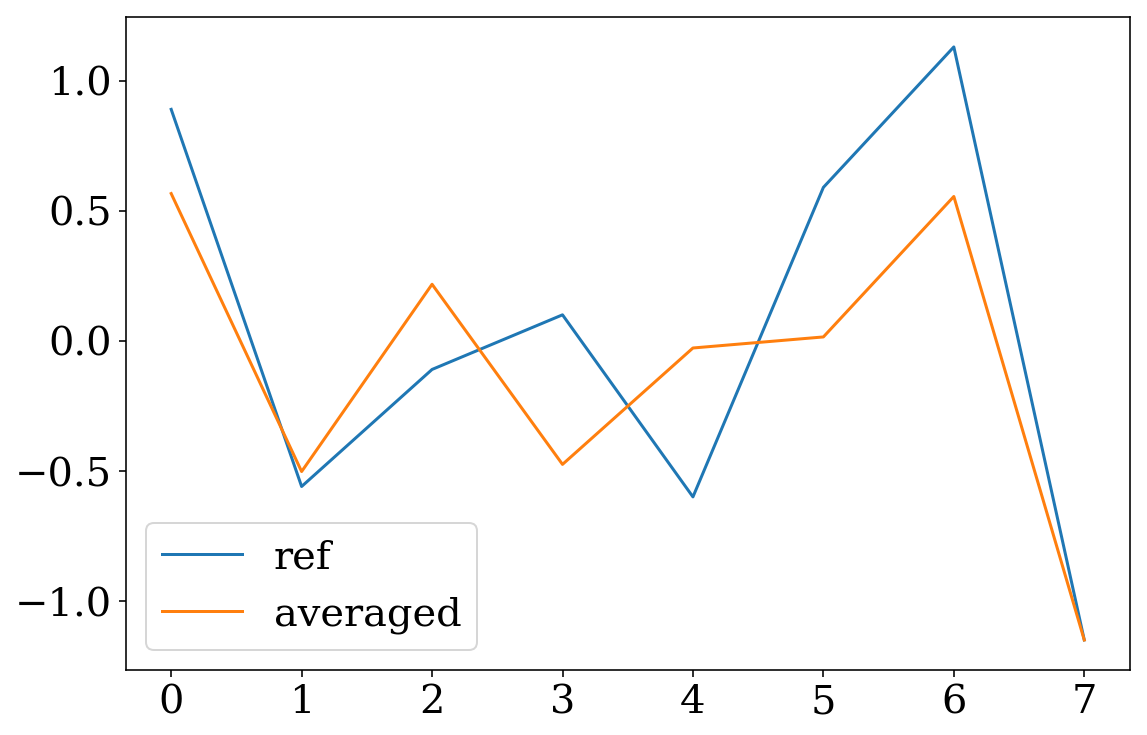

In [153]:
V3 = gen_V(3)
H3 = gen_H(3)
G3 = gen_G(3)
ref_epi = G3 @ y 
bkg_epi = V3 @ H3 @ y
plt.plot(G3 @ y,label='ref')
plt.plot(V3 @ H3 @ y,label='averaged')
plt.legend()
plt.show()

In [155]:
print(np.mean(np.abs(ref_epi)))
print(np.mean(np.abs(bkg_epi)))

0.64125
0.43859375


In [141]:
print(G2 @ y[[0,2,4,6]])
print(G3 @ y)

[ 0.89 -0.11 -0.6   1.13]
[ 0.89 -0.56 -0.11  0.1  -0.6   0.59  1.13 -1.15]


In [142]:
y

array([ 0.89,  0.33,  0.78,  0.32,  0.29,  0.32,  1.31,  0.29])

In [83]:
N = 2
y = np.zeros(2**N)
mut_list =np.array( ['A','B'])
lookup = {}
for i in range(2**N):
    idx = np.array(list('{0:b}'.format(i)),dtype=np.int)
    print(idx)
    y[i] =     fitness(mut_list[idx])
    

[0]
[1]
[1 0]
[1 1]


In [84]:
G2 @ y

array([ 0.29,  0.49,  1.02, -1.02])

In [85]:
y

array([ 0.29,  0.78,  1.31,  0.78])